# MSDS 430 Milestone 2

<p style="font-family: Arial; font-size:1.7em;color:orange; font-style:bold">
     Project Group 1: Hemant Patel, Alexander Gil, Ayush Chadha
</p>

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this second milestone we will continue working toward the final project for this course. By now you should have a very clear picture of your plans for the final project, so these steps will simply walk you through some of the work.  </font>

**Step 1 (5 pts.): In Milestone 1, you gave a brief summary of your overall plans for the final project. What has changed since then? Has your problem changed? Did you choose a different data set? Why or why not? What additional detail can you provide with regard to your goals for the final project?**

Our project is to explore the loan dataset previously selected and build a classification model with regards whether a loan will be classified as fully paid or not. Our problem has not changed. The goal of the final project is to understand what variables are key in important when making the decision to issue a loan or not (will be fully paid or not). The project has not changed since Milestone 1. We have concentrated our efforts in getting to know the dataset and understanding the variables as a first step in the analysis. 



**Step 2 (5 pts.): Read in your data file and use pandas and clean up your data as needed. Extract only what you will be using for this project and demonstrate this by creating a nicely formatted table of the first 20 rows of data relevant to your needs for the project. Each column should align nicely and be clearly labeled. Remember to include any relevant comments within your code.**

In [134]:
# import base packages into the namespace for this program
import re
import numpy as np
import pandas as pd
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from sklearn.preprocessing import Imputer

In [135]:
#Load the dataset from csv into pandas 
loan_input = pd.read_csv('loan.csv',low_memory=False) #Read the loan dataset downladed from Kaggle

In [136]:
#Loading description of data
desc = pd.read_excel('LCDataDictionary.xlsx').dropna()
desc.style.set_properties(**{'width': '500px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [137]:
#Print the data, Columns, Statistics etc
print("===============================================================================")
print(" Loan Data (5 rows)")
print(loan_input.head())
print("===============================================================================")
print(" Loan Data (Columns)")
print(loan_input.columns)
print("===============================================================================")
print(" Loan Data (Information)")
print(loan_input.info())
print("===============================================================================")
print(" Loan Data (statistics)")
print(loan_input.describe())
print("===============================================================================")


 Loan Data (5 rows)
   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_set

In [138]:
loan_input

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
#Select the columns needed [36 out of 147]
loan_input = loan_input[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','home_ownership','annual_inc','verification_status','loan_status',
  'pymnt_plan',
  'purpose',
  'title',
  'delinq_2yrs',
  'earliest_cr_line',
  'inq_last_6mths',
  'mths_since_last_delinq',
  'mths_since_last_record',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'revol_util',
  'total_pymnt',
  'recoveries',
  'tot_cur_bal',
  'avg_cur_bal',
  'delinq_amnt',
  'mort_acc',
  'hardship_flag',
  'hardship_type',
  'hardship_reason',
  'hardship_status',
  'deferral_term',
  'hardship_amount',
  'settlement_status']]

In [140]:
#loan_input.fillna(loan_input.mean(), inplace=True)
len(loan_input.columns)

36

In [141]:
#Display the 20 rows 
loan_input.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,avg_cur_bal,delinq_amnt,mort_acc,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,settlement_status
0,2500,2500,2500.0,36 months,13.56,84.92,C,RENT,55000.0,Not Verified,...,1878.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000,30000,30000.0,60 months,18.94,777.23,D,MORTGAGE,90000.0,Source Verified,...,24763.0,0.0,3.0,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,MORTGAGE,59280.0,Source Verified,...,18383.0,0.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000,4000,4000.0,36 months,18.94,146.51,D,MORTGAGE,92000.0,Source Verified,...,30505.0,0.0,3.0,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,16.14,731.78,C,MORTGAGE,57250.0,Not Verified,...,9667.0,0.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN
5,5550,5550,5550.0,36 months,15.02,192.45,C,MORTGAGE,152500.0,Not Verified,...,40338.0,0.0,6.0,N,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,2000,2000.0,36 months,17.97,72.28,D,RENT,51000.0,Source Verified,...,854.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN
7,6000,6000,6000.0,36 months,13.56,203.79,C,RENT,65000.0,Source Verified,...,5085.0,0.0,1.0,N,NaN,NaN,NaN,NaN,NaN,NaN
8,5000,5000,5000.0,36 months,17.97,180.69,D,MORTGAGE,53580.0,Source Verified,...,5235.0,0.0,3.0,N,NaN,NaN,NaN,NaN,NaN,NaN
9,6000,6000,6000.0,36 months,14.47,206.44,C,OWN,300000.0,Not Verified,...,9197.0,0.0,1.0,N,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Replace the name of some columns
loan_input = loan_input.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate","term": "term(months)", "annual_inc": "annual_income"})


In [143]:
# Examine shape of data -> list column headers and data types
loan_input.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 36 columns):
loan_amount               2260668 non-null int64
funded_amount             2260668 non-null int64
investor_funds            2260668 non-null float64
term(months)              2260668 non-null object
interest_rate             2260668 non-null float64
installment               2260668 non-null float64
grade                     2260668 non-null object
home_ownership            2260668 non-null object
annual_income             2260664 non-null float64
verification_status       2260668 non-null object
loan_status               2260668 non-null object
pymnt_plan                2260668 non-null object
purpose                   2260668 non-null object
title                     2237343 non-null object
delinq_2yrs               2260639 non-null float64
earliest_cr_line          2260639 non-null object
inq_last_6mths            2260638 non-null float64
mths_since_last_delinq    1102166

In [144]:
 #We see that there are columns that have missing values. Lets drop the columns that have over 80% of missing values.

loan_input = loan_input.dropna(axis = 1, thresh = int(0.80*len(loan_input)))
loan_input.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 28 columns):
loan_amount            2260668 non-null int64
funded_amount          2260668 non-null int64
investor_funds         2260668 non-null float64
term(months)           2260668 non-null object
interest_rate          2260668 non-null float64
installment            2260668 non-null float64
grade                  2260668 non-null object
home_ownership         2260668 non-null object
annual_income          2260664 non-null float64
verification_status    2260668 non-null object
loan_status            2260668 non-null object
pymnt_plan             2260668 non-null object
purpose                2260668 non-null object
title                  2237343 non-null object
delinq_2yrs            2260639 non-null float64
earliest_cr_line       2260639 non-null object
inq_last_6mths         2260638 non-null float64
open_acc               2260639 non-null float64
pub_rec                2260639 non-n

In [145]:
#Encoding loan_status into two categories: Good loan & Not a good loan for our analysis
loan_input['loan_status'] = loan_input['loan_status'].replace({'Charged Off':'Not a good loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'Late (31-120 days)':'Not a good loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'Does not meet the credit policy. Status:Charged Off':'Not a good loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'Default':'Not a good loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'Late (16-30 days)':'Not a good loan'})

loan_input['loan_status'] = loan_input['loan_status'].replace({'Fully Paid':'Good Loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'Current':'Good Loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'In Grace Period':'Good Loan'})
loan_input['loan_status'] = loan_input['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid':'Good Loan'})

loan_input['loan_status'] = loan_input['loan_status'].astype('category').cat.codes
print(loan_input['loan_status'].value_counts())
print("Where 0 is Good loan and 1 is Not a Good Loan")

0    1972587
1     288081
Name: loan_status, dtype: int64
Where 0 is Good loan and 1 is Not a Good Loan


In [146]:
#Let's explore annual income and deal with its missing values
loan_input['annual_income'].describe()

loan_input['annual_income'] = loan_input['annual_income'].fillna(loan_input['annual_income'].mean())

print(np.isnan(loan_input['annual_income']).sum())

0


In [147]:
loan_input['earliest_cr_line']= pd.to_datetime(loan_input['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
print(loan_input['earliest_cr_line'].head())

0     4
1     6
2     4
3     2
4    12
Name: earliest_cr_line, dtype: int64


Text(0.5, 1.0, 'Total committed by Investors')

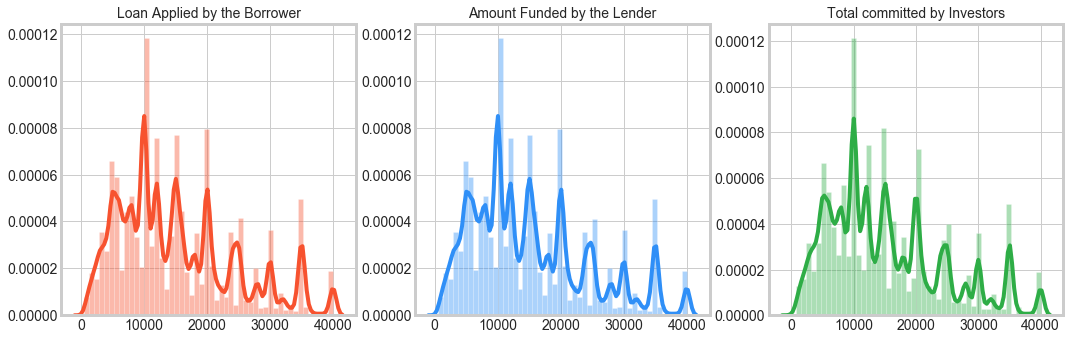

In [148]:
#distplots using sns library
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = loan_input["loan_amount"].values
funded_amount = loan_input["funded_amount"].values
investor_funds = loan_input["investor_funds"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [149]:
loan_input["loan_status"].value_counts()

0    1972587
1     288081
Name: loan_status, dtype: int64

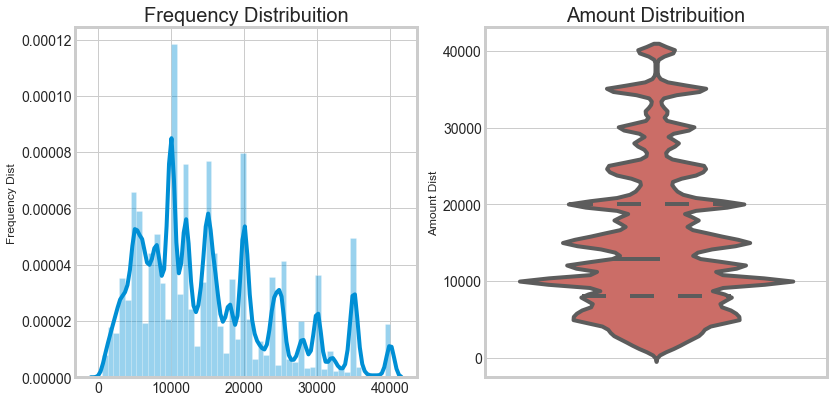

In [150]:
#I will start looking the loan_amnt column
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(loan_input["loan_amount"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amount", data=loan_input, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

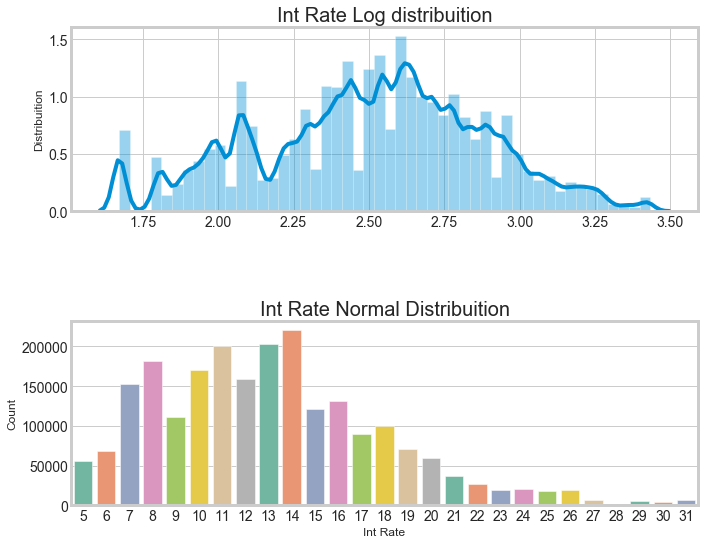

In [151]:
loan_input['int_round'] = loan_input['interest_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(loan_input["interest_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=loan_input, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

0    1972587
1     288081
Name: loan_status, dtype: int64


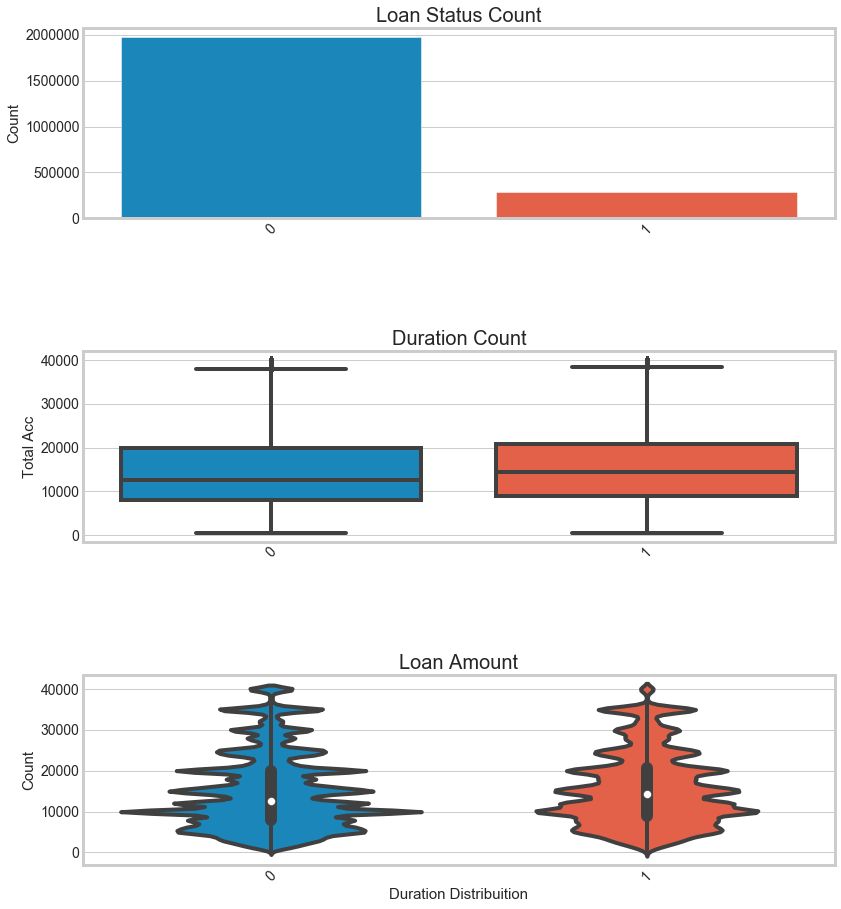

In [152]:
print(loan_input.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=loan_input)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="loan_amount", data=loan_input)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Total Acc", fontsize=15)
g1.set_title("Duration Count", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="loan_status", y="loan_amount", data=loan_input)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)
plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

In [153]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_input[purp_loan[0]], loan_input[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,0,1
purpose,,
car,21688,2325
credit_card,463463,53508
debt_consolidation,1101713,176164
educational,336,88
home_improvement,133600,16857
house,12366,1770
major_purchase,44445,6000
medical,23802,3686
moving,13026,2377


**Step 3 (5 pts.): Use numpy and the cleaned data to perform several calculations relevant to your final project. Explain each calculation by including comments within your code. Your output should clearly state what each calculation is, i.e. "The mean height of those in the data is X"**

In [154]:
#Perform calculations using numpy
mean_annualincome = np.mean(loan_input.annual_income)
mean_fundedAmount = np.mean(loan_input.funded_amount)
mean_installment = np.mean(loan_input.installment)
mean_interestrate = np.mean(loan_input.interest_rate)
mean_loanamount = np.mean(loan_input.loan_amount)


print(" Mean annual income :",mean_annualincome)
print(" Mean funded amount :",mean_fundedAmount)
print(" Mean installment :",mean_installment)
print(" Mean interest rate :",mean_interestrate)
print(" Mean loan amount :",mean_loanamount)

 Mean annual income : 77992.42868706737
 Mean funded amount : 15041.664056818605
 Mean installment : 445.8076459263479
 Mean interest rate : 13.09291294419326
 Mean loan amount : 15046.931227849467


In [155]:
#Create a random index using numpy and check the dataset for that random index to get the feel of data
from random import sample
rindex = np.array(sample(range(len(loan_input)), 5))
print(loan_input.loc[rindex])

         loan_amount  funded_amount  investor_funds term(months)  \
2154615        25000          25000         25000.0    60 months   
1050758        12000          12000         12000.0    36 months   
1030408        12000          12000         12000.0    36 months   
1682551         3500           3500          3500.0    36 months   
1315225        12000          12000         11975.0    60 months   

         interest_rate  installment grade home_ownership  annual_income  \
2154615          13.59       576.41     C       MORTGAGE       225000.0   
1050758           9.17       382.55     B           RENT        65000.0   
1030408           9.99       387.15     B           RENT        62000.0   
1682551           6.62       107.47     A           RENT        24000.0   
1315225          21.99       331.36     E            OWN        80000.0   

        verification_status  ...  revol_bal revol_util   total_pymnt  \
2154615     Source Verified  ...      95793       59.9   7595.620000

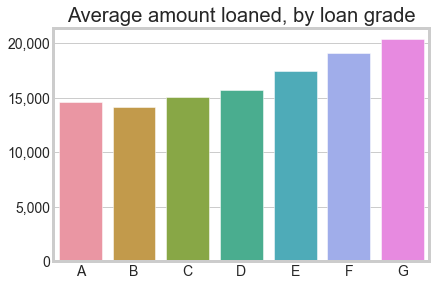

In [156]:
group = loan_input.groupby('grade').agg([np.mean])
loan_amt_mean = group['loan_amount'].reset_index()

import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')

sns.set_style("whitegrid")
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

**Step 4 (5 pts.): Use matplotlib to create at least two visual displays relevant to your final project. Explain your graphs by including comments within your code. Your displays should be labeled clearly and appropriately scaled.**

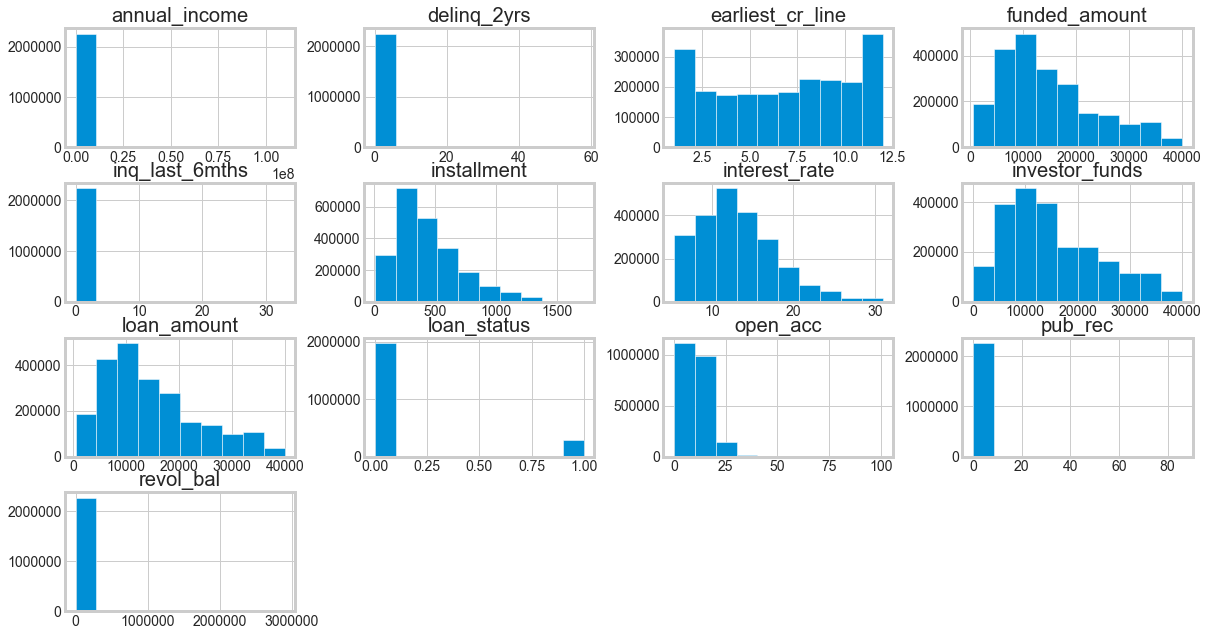

In [157]:
# Plot histrograms for numeric columns found between 0:20
loan_input.iloc[:,0:20].hist(grid=True, figsize=(18,10))
plt.show()

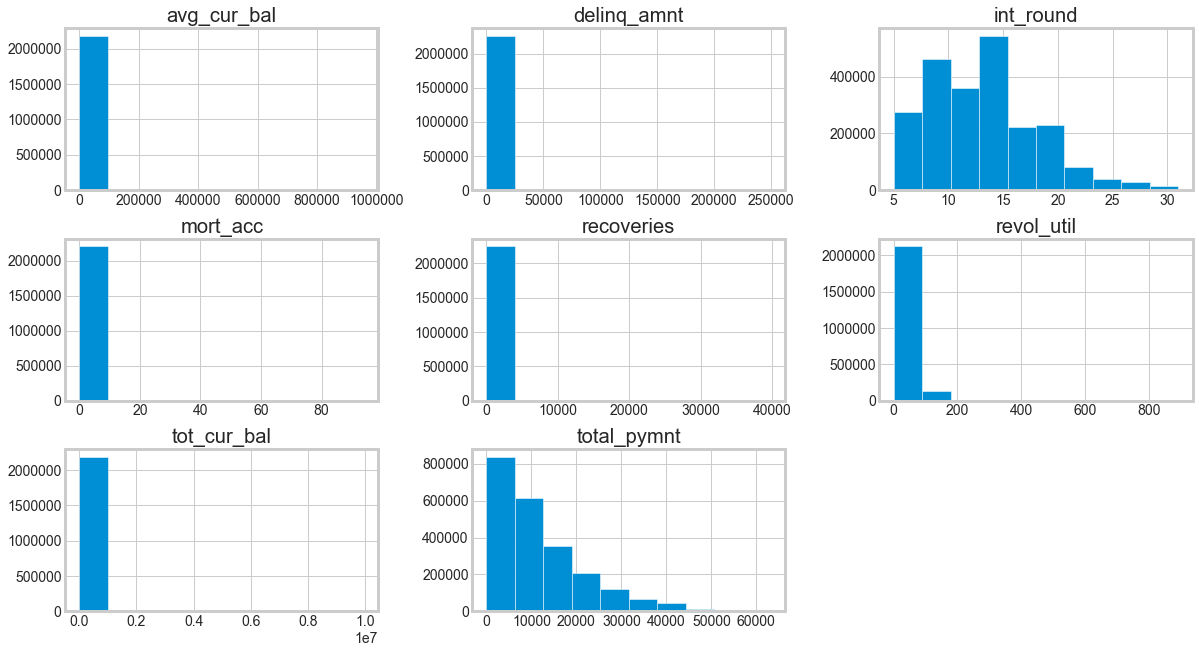

In [158]:
# Plot histrograms for numeric columns found between 0:20
loan_input.iloc[:,20:36].hist(grid=True, figsize=(18,10))
plt.show()

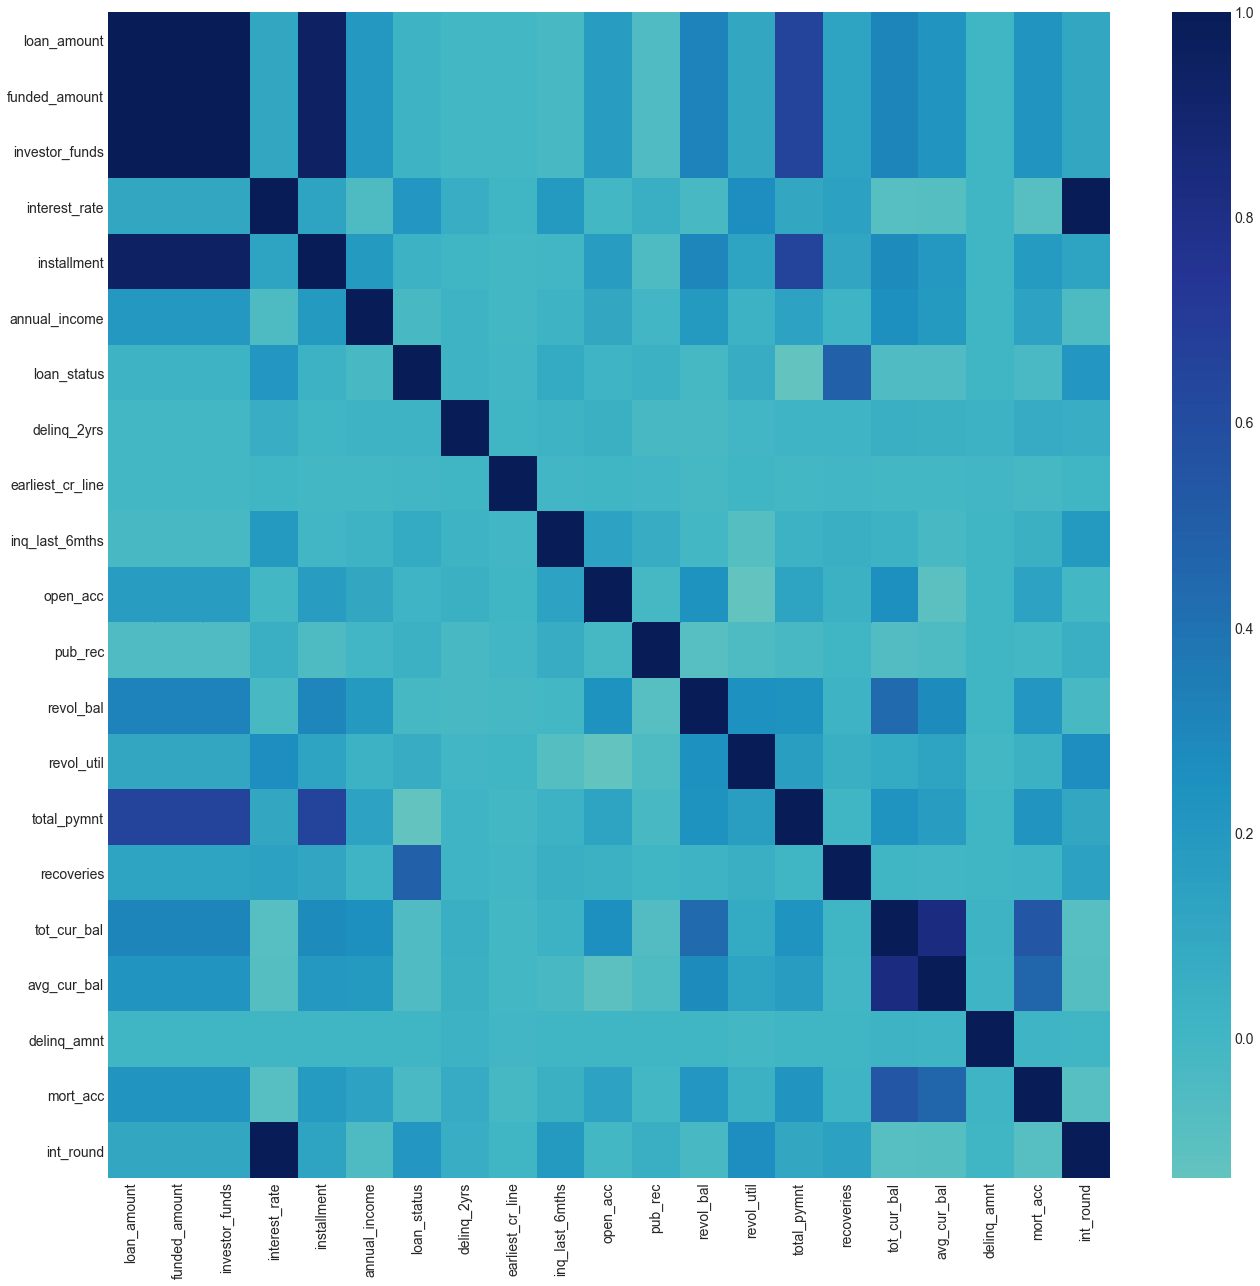

In [159]:
# Correlation matrix plot for numerical data
corr_matrix = loan_input.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, center=0, cmap='YlGnBu')
plt.savefig('loan_data_reduced_CorrelationMatrix.pdf', orientation='landscape', format='pdf', dpi=1200, bbox_inches = 'tight')
plt.show()

In [160]:
# Examine distributions for categorical features
# print(loan_input.groupby('term').size())
# print('\n\n')
print(loan_input.groupby('grade').size())
print('\n\n')
print(loan_input.groupby('home_ownership').size())
print('\n\n')
print(loan_input.groupby('verification_status').size())
print('\n\n')
print(loan_input.groupby('loan_status').size())
print('\n\n')
print(loan_input.groupby('pymnt_plan').size())
print('\n\n')
print(loan_input.groupby('purpose').size())
print('\n\n')
print(loan_input.groupby('title').size())
print('\n\n')
print(loan_input.groupby('hardship_flag').size())
print('\n\n')
# print(loan_input.groupby('settlement_status').size())
# print('\n\n')
print(loan_input.groupby('recoveries').size())

grade
A    433027
B    663557
C    650053
D    324424
E    135639
F     41800
G     12168
dtype: int64



home_ownership
ANY             996
MORTGAGE    1111450
NONE             54
OTHER           182
OWN          253057
RENT         894929
dtype: int64



verification_status
Not Verified       744806
Source Verified    886231
Verified           629631
dtype: int64



loan_status
0    1972587
1     288081
dtype: int64



pymnt_plan
n    2259986
y        682
dtype: int64



purpose
car                     24013
credit_card            516971
debt_consolidation    1277877
educational               424
home_improvement       150457
house                   14136
major_purchase          50445
medical                 27488
moving                  15403
other                  139440
renewable_energy         1445
small_business          24689
vacation                15525
wedding                  2355
dtype: int64



title
\tcredit_card                                                   2
\tdebt

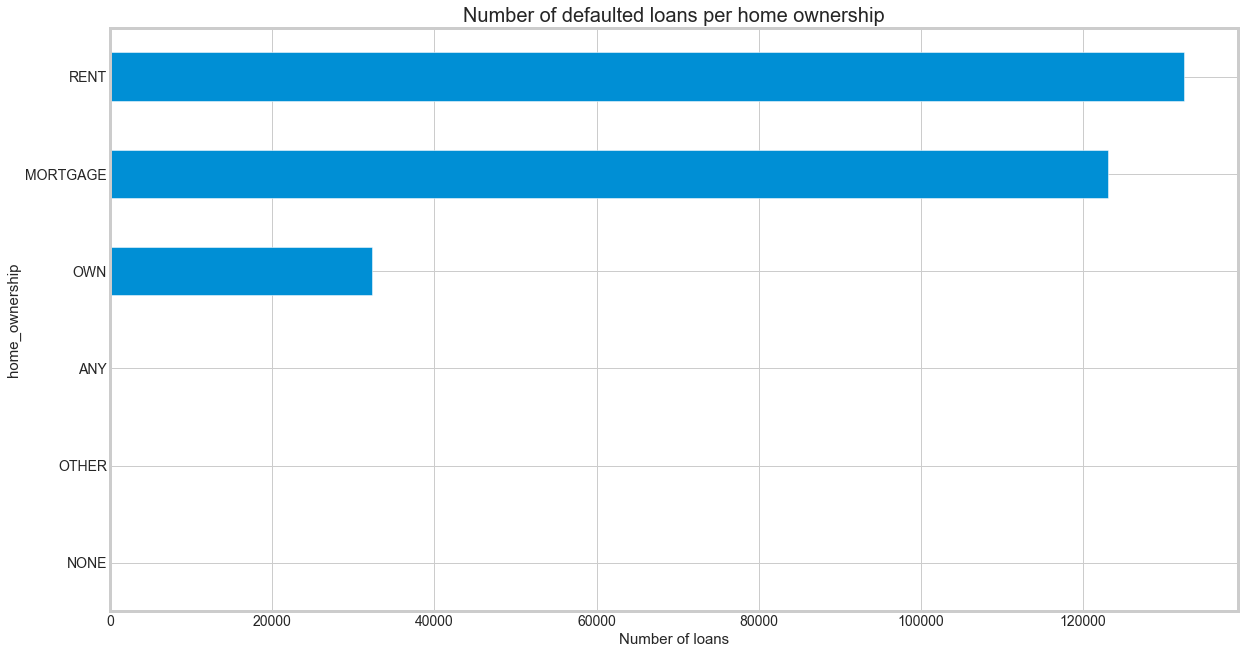

In [162]:
fig = plt.figure(figsize=(18,10))
loan_input[loan_input['loan_status']==1].groupby('home_ownership')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('home_ownership',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per home ownership',fontsize=20);

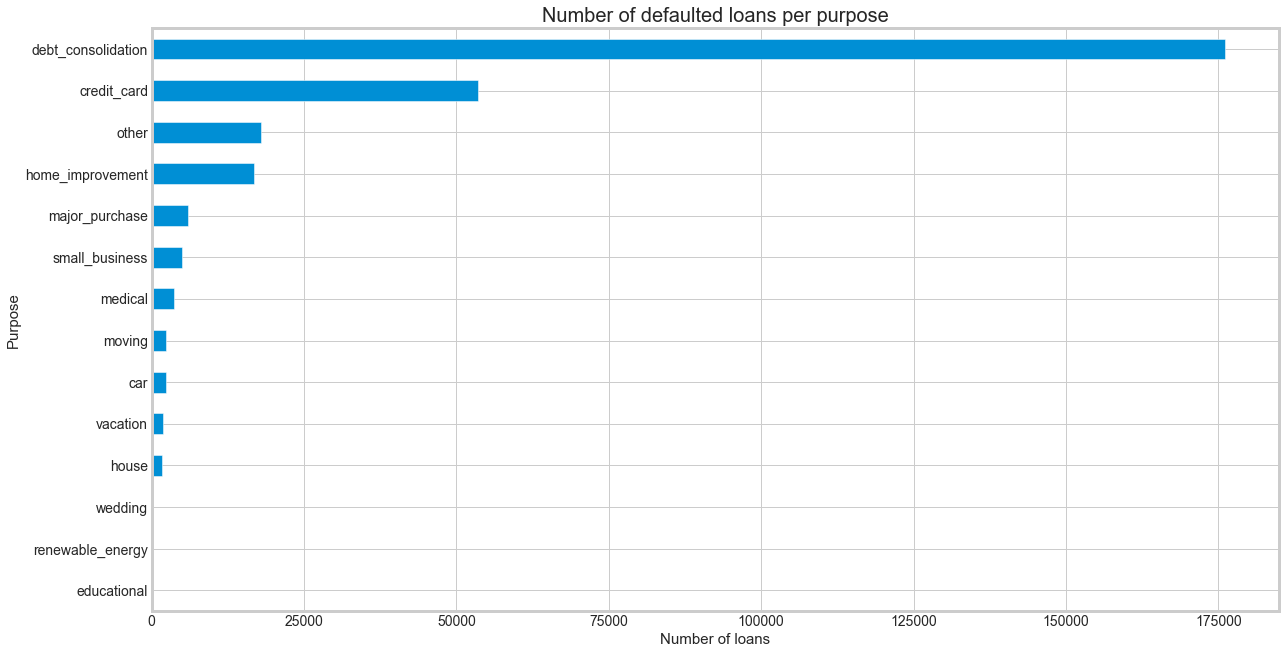

In [163]:
fig = plt.figure(figsize=(18,10))
loan_input[loan_input['loan_status']==1].groupby('purpose')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('Purpose',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per purpose',fontsize=20);

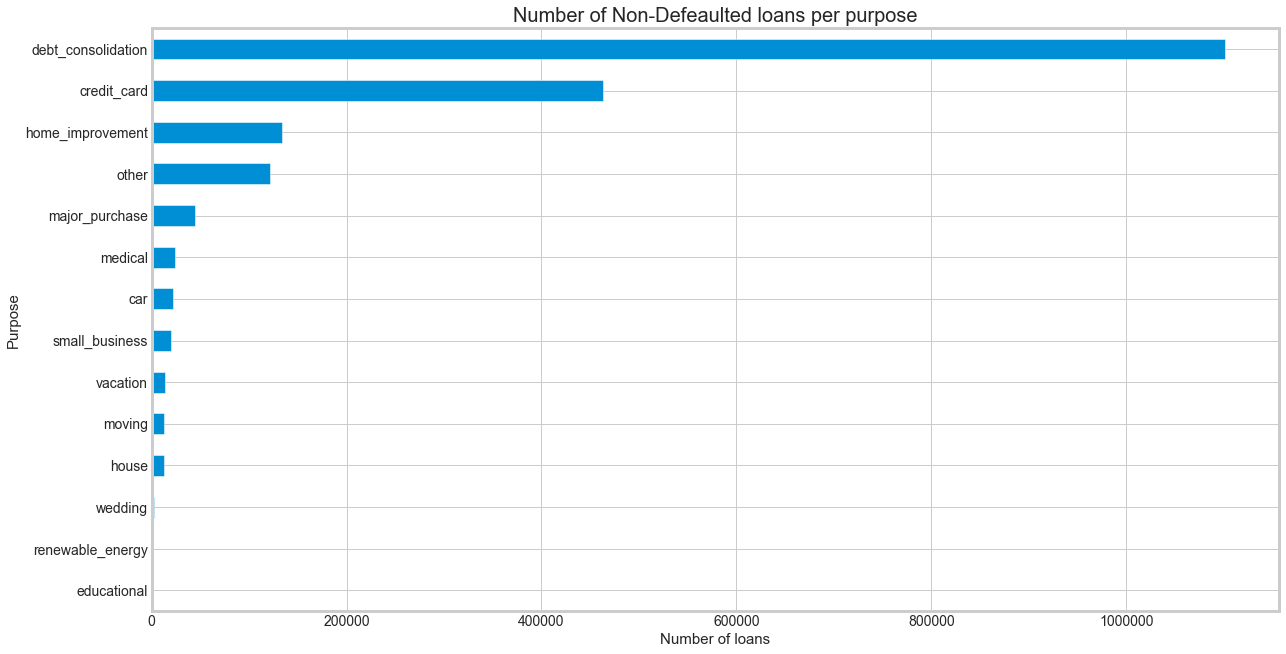

In [164]:
fig = plt.figure(figsize=(18,10))
loan_input[loan_input['loan_status']==0].groupby('purpose')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('Purpose',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of Non-Defeaulted loans per purpose',fontsize=20);

As we can see from both graphs, loans by purpose have the highest concentration in debt consolidation. We can't really take in this information for modeling defaulted loans since the concentration is highest in this purpose. We could perhaps perform some feature engineering of loan status and see if anything changes. Otherwise, this variable could be dropped. 

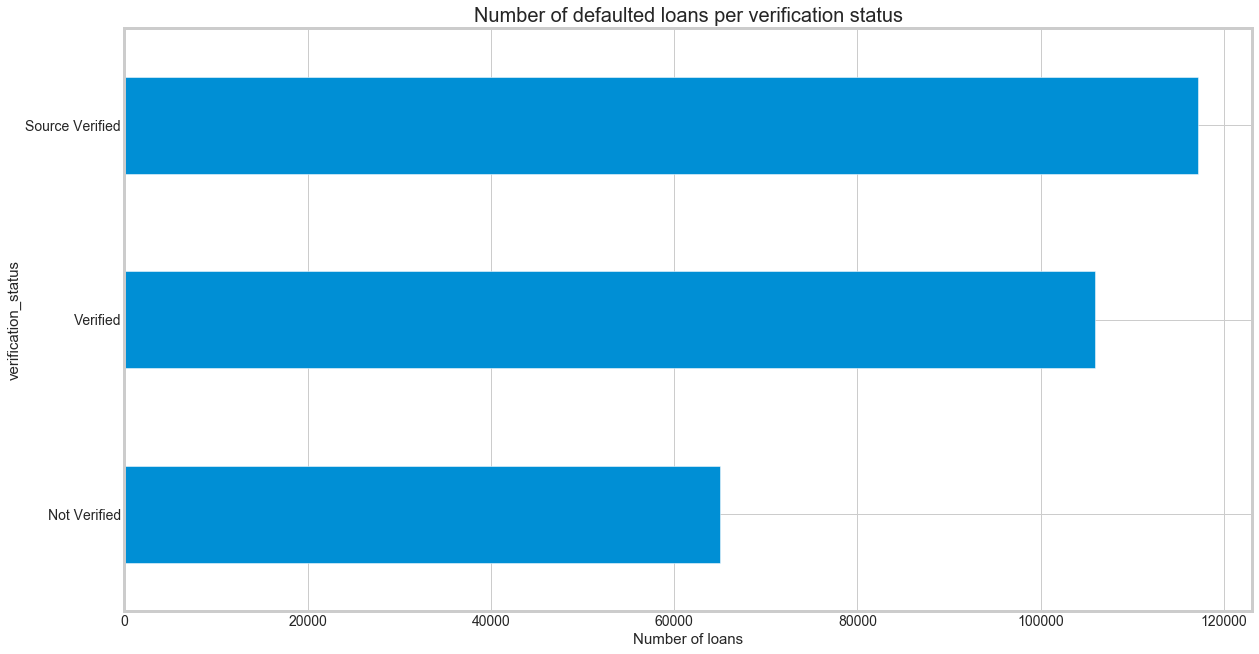

In [166]:
fig = plt.figure(figsize=(18,10))
loan_input[loan_input['loan_status']==1].groupby('verification_status')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('verification_status',fontsize=15)

plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per verification status',fontsize=20);

Text(0.5, 1.0, 'Type of Loan by Purpose')

<Figure size 720x720 with 0 Axes>

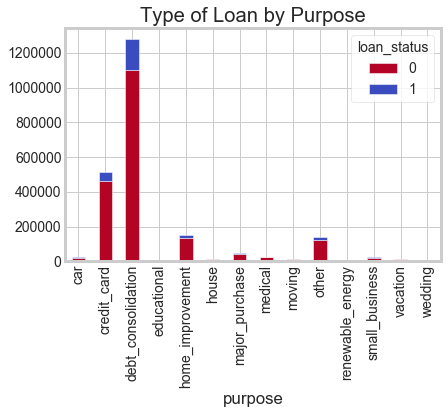

In [167]:
fig = plt.figure(figsize=(10,10))

cmap = plt.cm.coolwarm_r

loans_by_purpose = loan_input.groupby(['purpose','loan_status']).size()
loans_by_purpose.unstack().plot(kind='bar', stacked=True,colormap=cmap)
plt.title("Type of Loan by Purpose")

Now that we have encounded loan status as good and not a good loan, we can see more information when it comes to purpose. 

In [168]:
#Exploring the title column
loan_input['title'].value_counts()

Debt consolidation                          1153293
Credit card refinancing                      469691
Home improvement                             137437
Other                                        127714
Major purchase                                44840
Medical expenses                              25388
Business                                      20804
Car financing                                 20526
Debt Consolidation                            15763
Vacation                                      14443
Moving and relocation                         13800
Home buying                                   12714
Consolidation                                  5385
debt consolidation                             4837
Debt Consolidation Loan                        3804
Credit Card Consolidation                      2360
consolidation                                  2175
Personal Loan                                  2133
Consolidation Loan                             1778
Home Improve

This column seems to be redundant from the Purpose column. We could drop this as any information in Title would be Captured in the Purpose Column. We're also going to drop funded amount, and investor funds

In [169]:
loan_input.drop(['title','funded_amount', 'investor_funds'],1,inplace=True)


Text(0.5, 1.0, 'Type of loans by Grade')

<Figure size 720x720 with 0 Axes>

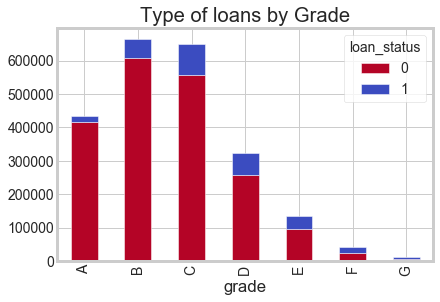

In [170]:
fig = plt.figure(figsize=(10,10))

cmap = plt.cm.coolwarm_r

loans_by_grade = loan_input.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap)
plt.title("Type of loans by Grade")

Text(0.5, 1.0, 'Type of loans by Term(months)')

<Figure size 720x720 with 0 Axes>

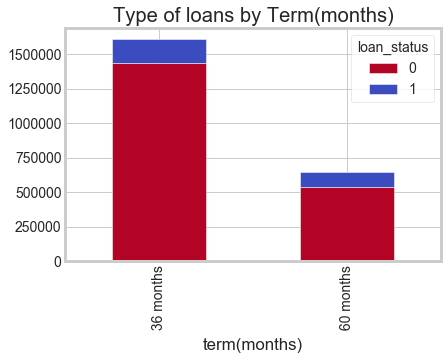

In [171]:
fig = plt.figure(figsize=(10,10))

cmap = plt.cm.coolwarm_r

loans_by_grade = loan_input.groupby(['term(months)', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap)
plt.title("Type of loans by Term(months)")

In [180]:
for col in('purpose','open_acc','pub_rec','revol_util','tot_cur_bal','delinq_amnt','mort_acc','avg_cur_bal','inq_last_6mths'):
    loan_input[col] = loan_input[col].fillna(0)


In [181]:
loan_input['delinq_2yrs'] = loan_input['delinq_2yrs'].transform(lambda x: x.fillna(x.mean()))
loan_input['pub_rec'] = loan_input['pub_rec'].transform(lambda x: x.fillna(x.mean()))

In [182]:
loan_input.isnull().sum().max()

0

In [184]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

for train_set, test_set in stratified.split(loan_input, loan_input['loan_status']):
    stratified_train = loan_input.loc[train_set]
    stratified_test = loan_input.loc[test_set]
    
print('Train set ratio', stratified_train['loan_status'].value_counts()/len(loan_input))
print('\nTest set ratio', stratified_test['loan_status'].value_counts()/len(loan_input))

Train set ratio 0    0.698054
1    0.101946
Name: loan_status, dtype: float64

Test set ratio 0    0.174514
1    0.025486
Name: loan_status, dtype: float64


In [185]:
train_df = stratified_train
test_df = stratified_test

train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

